In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

input_path_thyroid = '../../input/uci_thyroid'
tsh_transform = lambda x: np.log(1e-5 + x)
col_names = [
    'age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
    'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid',
    'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
    'psych', 'TSH', 'T3', 'TT4', 'T4U', 
    'FTI'
]
class_names = ['normal', 'hyper', 'hypo']
df_thyr = [
    pd.read_csv(
        f'{input_path_thyroid}/ann-{tag}.data', header=None, names=col_names+['class'],
        delim_whitespace=True
    )
    for tag in ['train', 'test']
]
df_thyr = pd.concat([
    pd.concat(df_thyr, axis=0, ignore_index=True), 
    pd.Series([0]*len(df_thyr[0]) + [1]*len(df_thyr[1]), name='test')
], axis=1)
df_thyr = df_thyr.drop_duplicates()
del df_thyr['hypopituitary']
# df_thyr['TSH_log'] = tsh_transform(df_thyr['TSH_log'])

df_thyr_train, df_thyr_test = df_thyr[df_thyr['test'] == 0], df_thyr[df_thyr['test'] == 1]

X_train, y_train = df_thyr_train.iloc[:, :-2], df_thyr_train['class']
X_test,  y_test  =  df_thyr_test.iloc[:, :-2],  df_thyr_test['class']

### Simple decision tree works well!!

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = make_pipeline(
    PowerTransformer(),
    DecisionTreeClassifier(
        random_state=42
    )
)

model.fit(X_train, y_train)
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test , model.predict(X_test )))

1.0
0.991812865497076


**Is power transform essential?**

In [3]:
model_another = make_pipeline(
    DecisionTreeClassifier(
        random_state=42
    )
)

model_another.fit(X_train, y_train)
print(accuracy_score(y_train, model_another.predict(X_train)))
print(accuracy_score(y_test , model_another.predict(X_test )))

1.0
0.9921052631578947


Not at all. Therefore I will throw ```PowerTransformer``` away.

In [6]:
model = DecisionTreeClassifier(
    random_state=42
).fit(X_train, y_train)

In [8]:
X_train.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,T4U,FTI
0,0.73,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


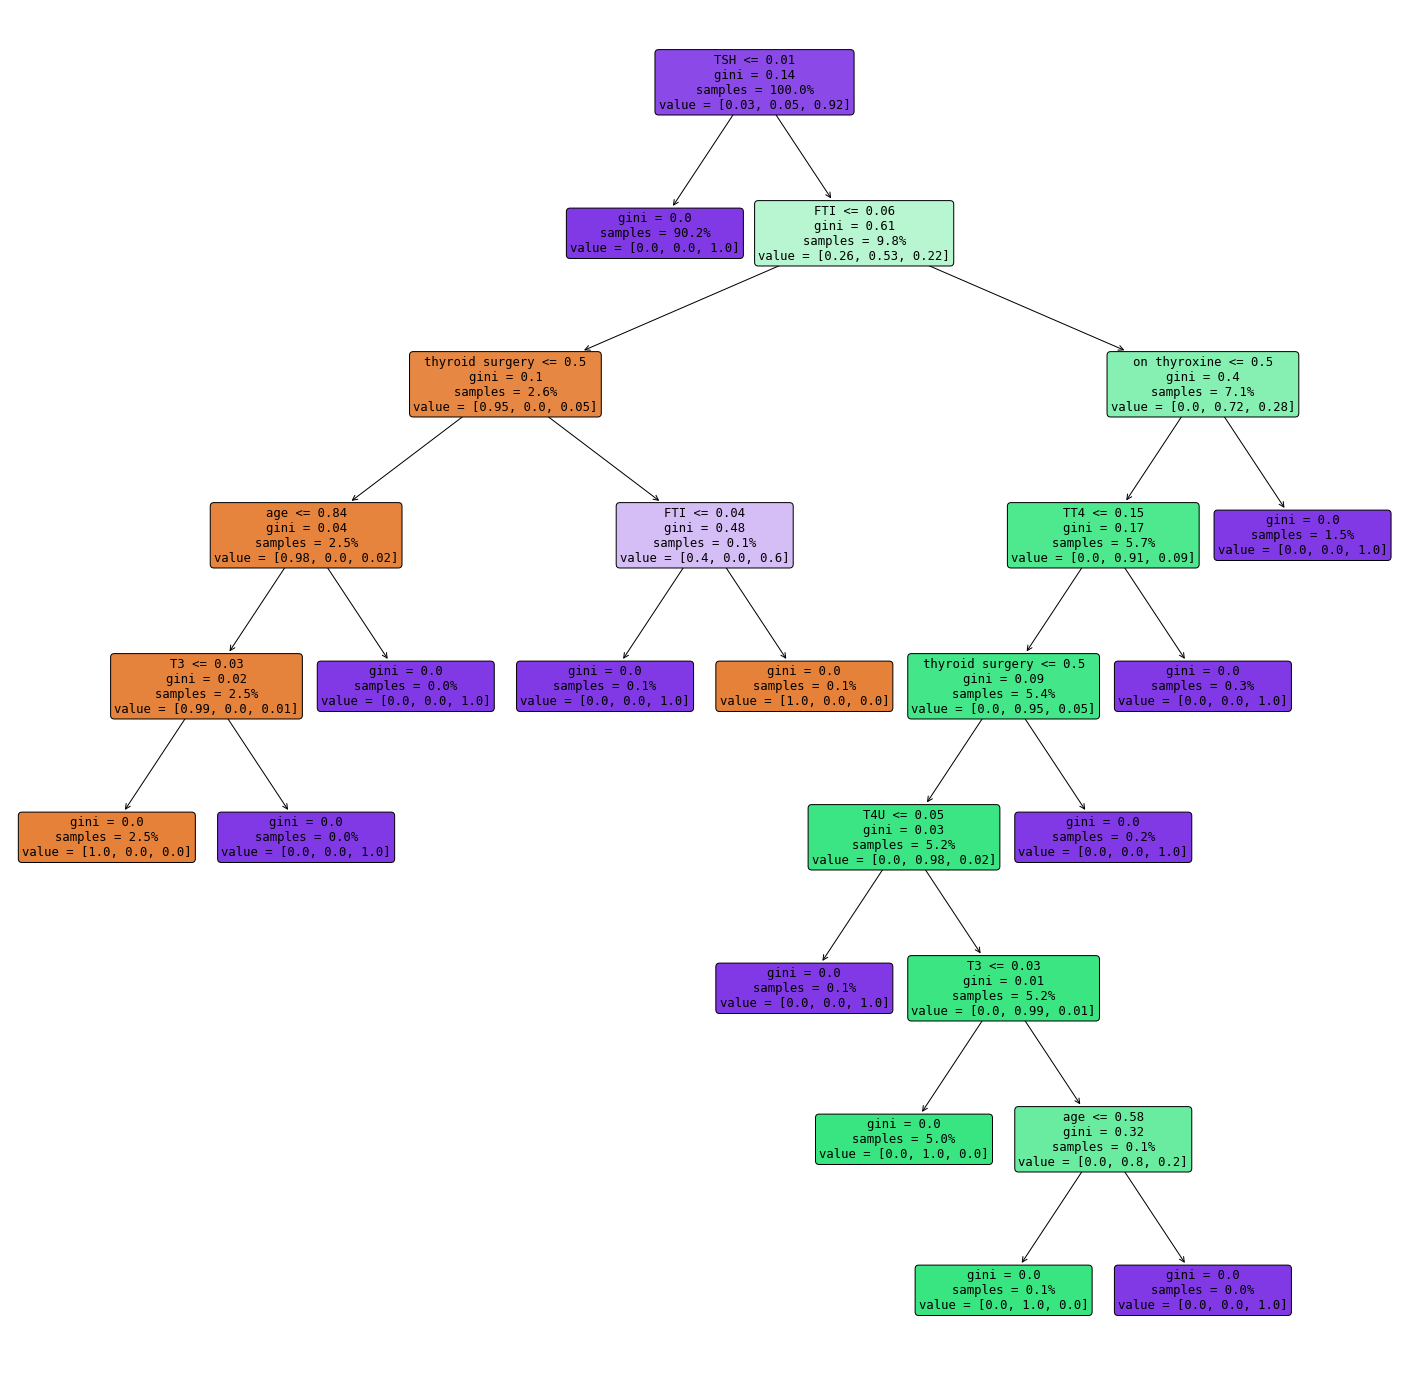

In [14]:
plt.figure(figsize=(25, 25))
annots = plot_tree(
    model,
    feature_names=X_train.columns,
    proportion=True,
    filled=True,
    rounded=True,
    precision=2,
)
plt.show(); plt.close()